# Test Exception

## Definition

An Exception is an event, which occurs during the execution of a program that disrupts the normal flow of the program’s instructions or in simple words, any issue which makes your test case stop in between the execution.

source: [click me](https://www.linkedin.com/pulse/11-most-common-exceptions-selenium-webdriver-logic-qa/)

When Selenium is used to run tests, exceptions can occur if there is a problem with the test script, the browser, or the application being tested.

Some examples of Selenium test exceptions include:

- `NoSuchElementException` <br>
raised when the script tries to interact with an element on the page that does not exist.
- `TimeoutException` <br>
raised when a command takes longer than the specified amount of time to complete.
- `NoSuchWindowException` <br> 
raised when the script tries to switch to a window that does not exist.
- `StaleElementReferenceException` <br>
raised when the script tries to interact with an element that is no longer attached to the DOM.

These are just a few examples and there are many more exception types that Selenium may raise, depending on the situation. It is important to handle these exceptions properly in order to avoid the script to stop working and to get a clear understanding of what went wrong.

# Test Exceptions

Page to test: https://practicetestautomation.com/practice-test-exceptions/

## Test case 1: NoSuchElementException

1. Open page
2. Click Add button
3. Verify Row 2 input field is displayed

Row 2 doesn’t appear immediately. This test will fail with org.openqa.selenium.NoSuchElementException without proper wait

In [ ]:
def test_no_element_exception(self, driver):
    # Open the page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    """Click Add button on Row 1"""
    # Verify The Row1 is displayed
    row1_locator = driver.find_element(By.ID, "row1")
    assert row1_locator.is_displayed()

    # Click Add button
    add_locator = driver.find_element(By.ID, "add_btn")
    assert add_locator.is_displayed(), "'Add' Button is missing"
    add_locator.click()

    """Row 2 Is displayed"""
        # Verify Row 2 availability
    row2_locator = driver.find_element(By.ID, "row2")
    assert row2_locator.is_displayed(), "Row 2 Is missing"
    
    # Verify the Toast bar is displayed
    toast_locator = driver.find_element(By.ID, "confirmation")
    actual_toast_msg = toast_locator.text
    assert actual_toast_msg == "Row 2 was added", "Added Toast Message is incorrect"



Previous script is correct when implemented normally, but on this case we'll receive this error <br>
`(TestException.test_no_element_exception) '' != 'Row 2 was added'`

This issue occurs because:
1. The elements is not loaded yet
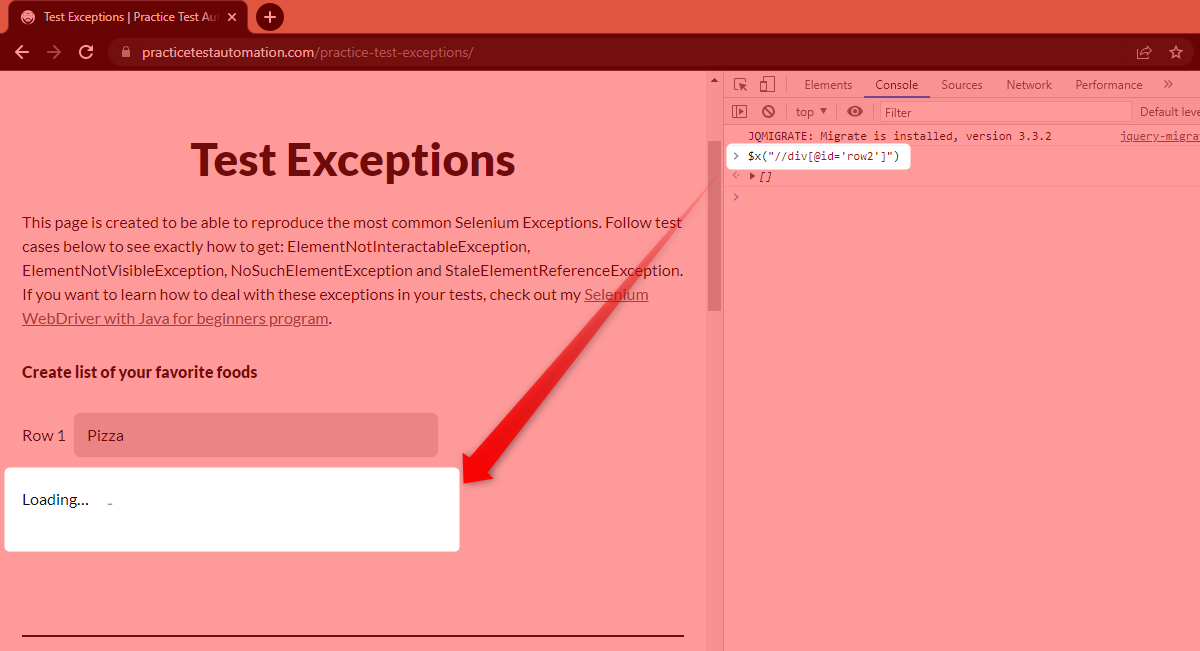 <br>
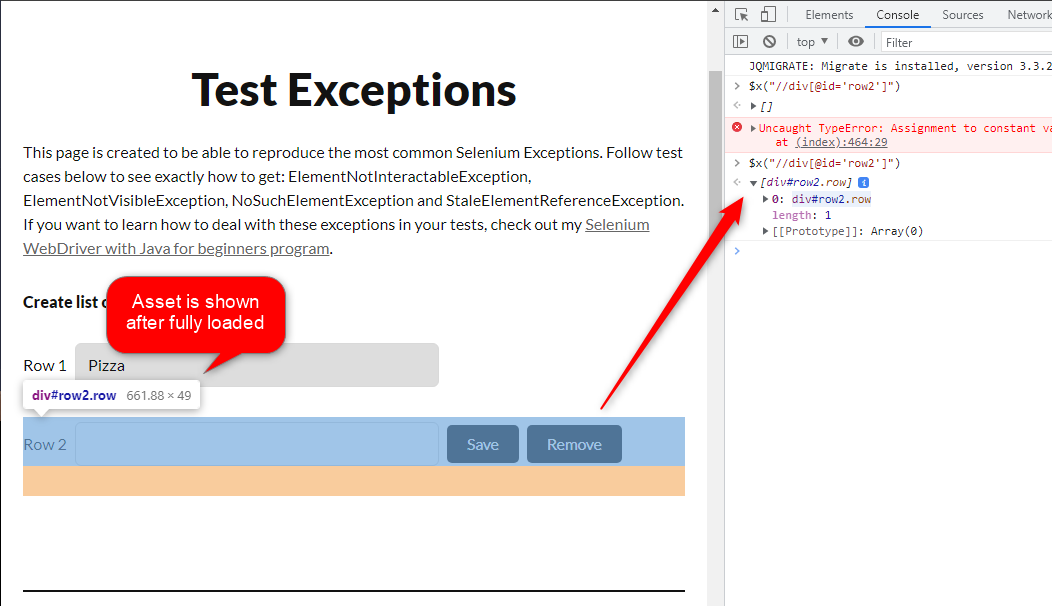
2. The waiting time for the asset fully loaded is less than actual loading time
3. The driver will return `"no element error"` since the assets is not there, when the script is executed.

Workaround for this issue is using explicit wait as described on the `4_1 python` file
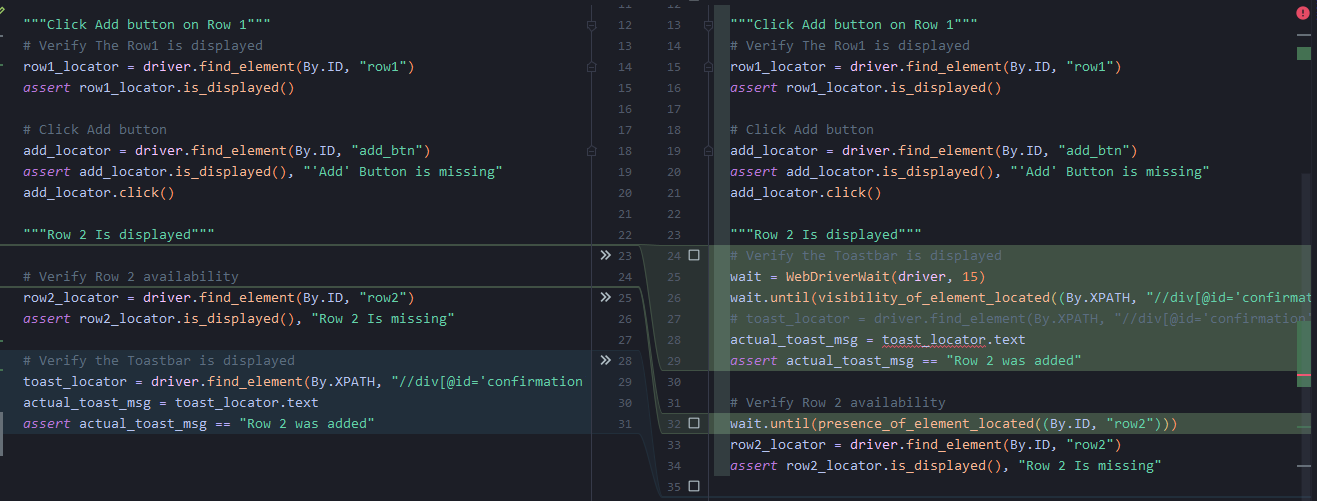

## Test case 2: ElementNotInteractableException

1. Open page
2. Click Add button
3. Wait for the second row to load
4. Type text into the second input field
5. Push Save button using locator By.name(“Save”)
6. Verify text saved

This page contains two elements with attribute name=”Save”.
The first one is invisible. So when we are trying to click on the invisible element, we get ElementNotInteractableException.

In [ ]:
def test_not_intractable_element(self, driver):
    # Open The Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    "Click Add button on Row 1"
    driver.find_element(By.ID, "add_btn").click()

    "Type text into the second input field"
    # Pass the text to the text box
    row2_input_locator = driver.find_element(By.XPATH, "//div[@id='row2']/input")
    row2_input_locator.send_keys("Written using python selenium")

    "Push Save button using locator By.name('Save')"
    save_btn_locator = driver.find_element(By.NAME, "Save")
    save_btn_locator.click()

    "Verify text saved"
    wait = WebDriverWait(driver, 30)
    save_toast_locator = wait.until(elem_vis((By.ID, "confirmation")))
    actual_save_toast = save_toast_locator.text
    assert actual_save_toast == "Row 2 was saved", "Saved Toast Message is incorrect"

By Running those scripts, we'll receive this error syntax <br>
`selenium.common.exceptions.ElementNotInteractableException: Message: element not interactable` <br>

This is the actual reason why this issue occurs:
1. We defined the script to find any elements with the "Save" name
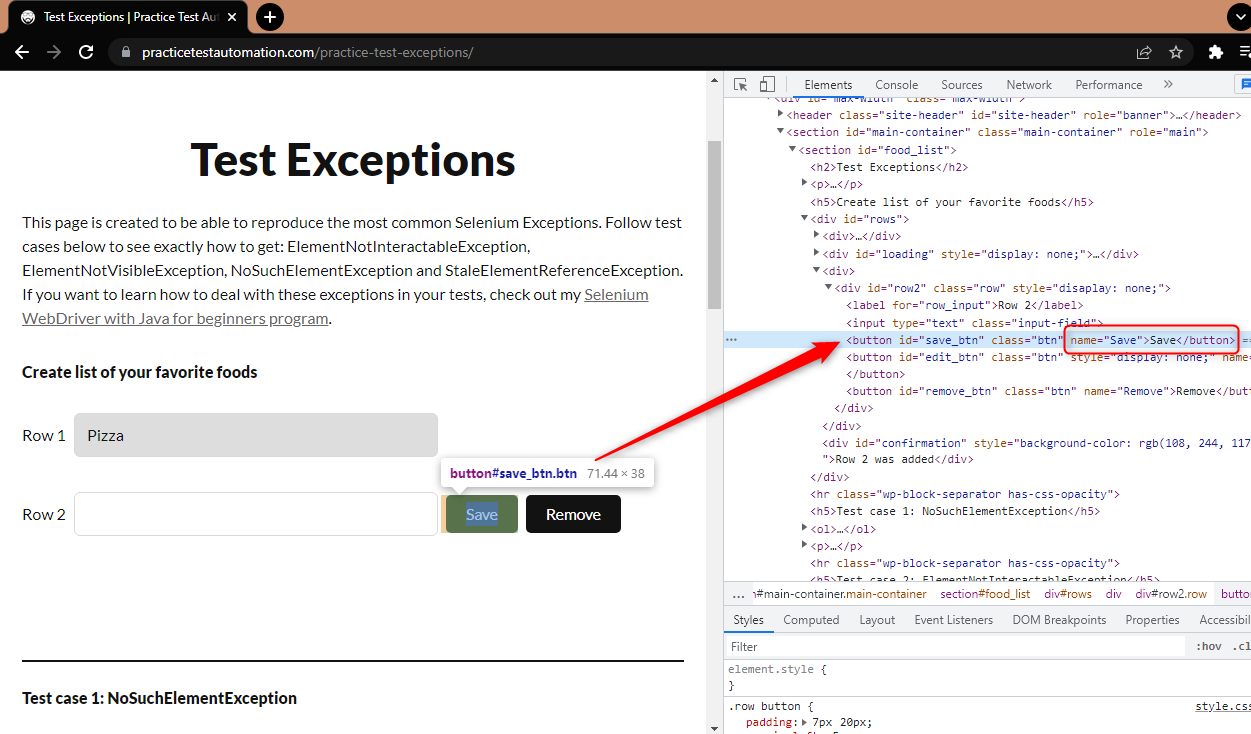
2. This is a correct locator but not unique elements
3. To validate wether this is an unique or not, we can use the console tab
4. `$x("//button[@name='Save']")`, will return all button object with the "Save" name
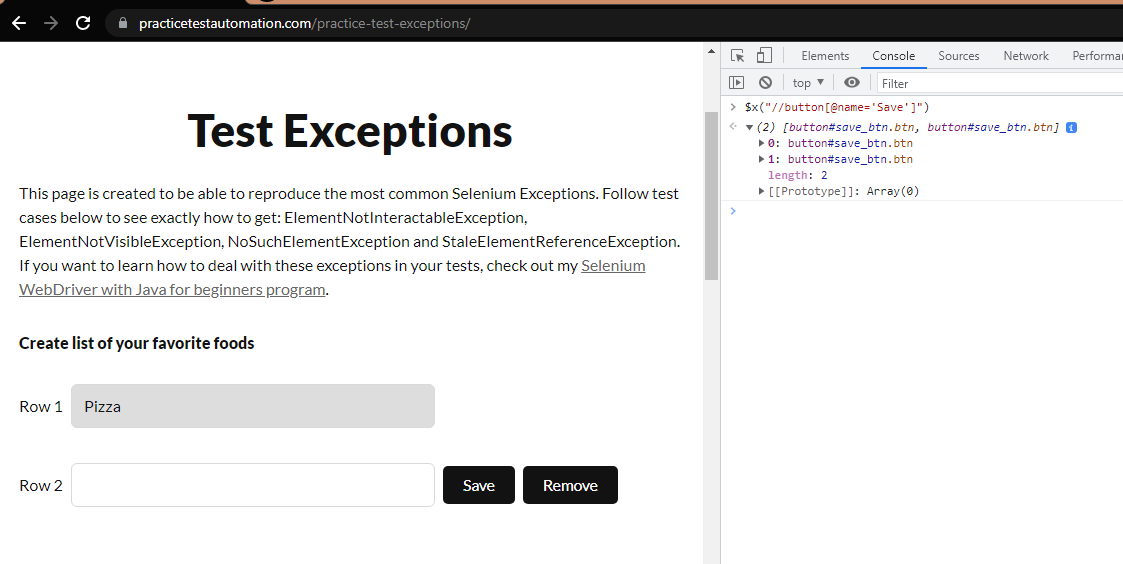
5. Check both returned elements
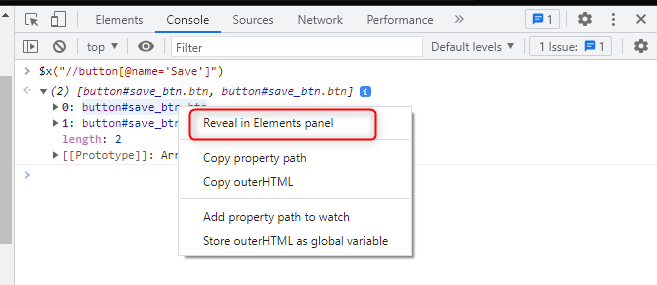
6. Notice that, there are another 'hidden' Save button on the elements
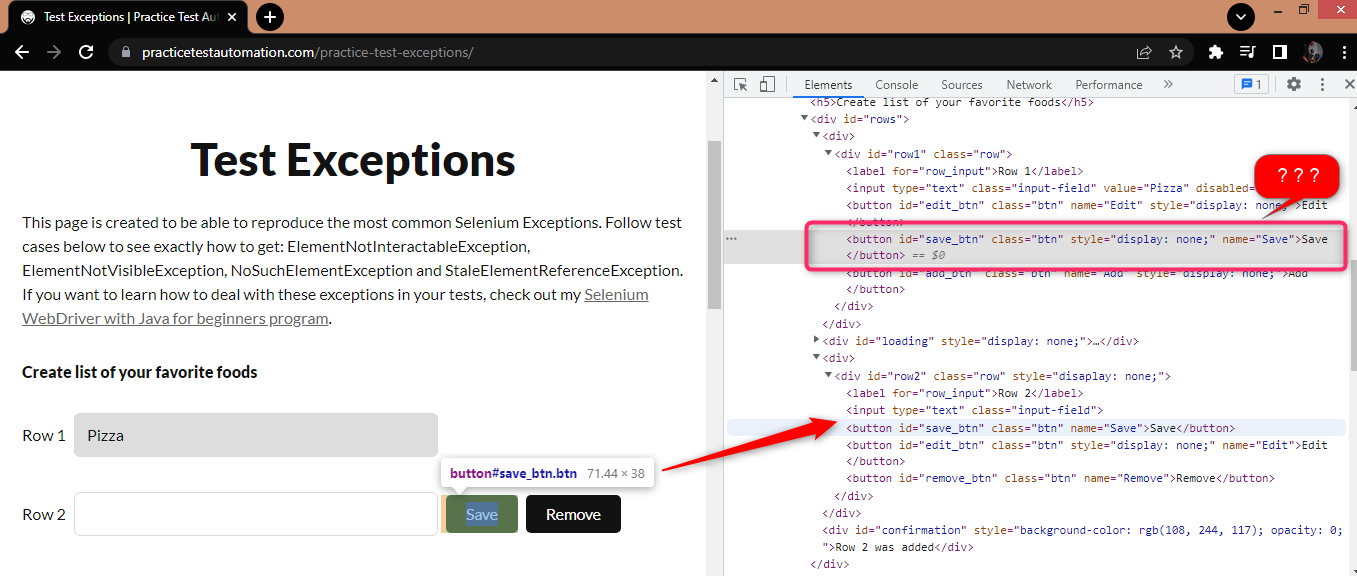

The hidden "Save" button can be revealed by editing Row 1
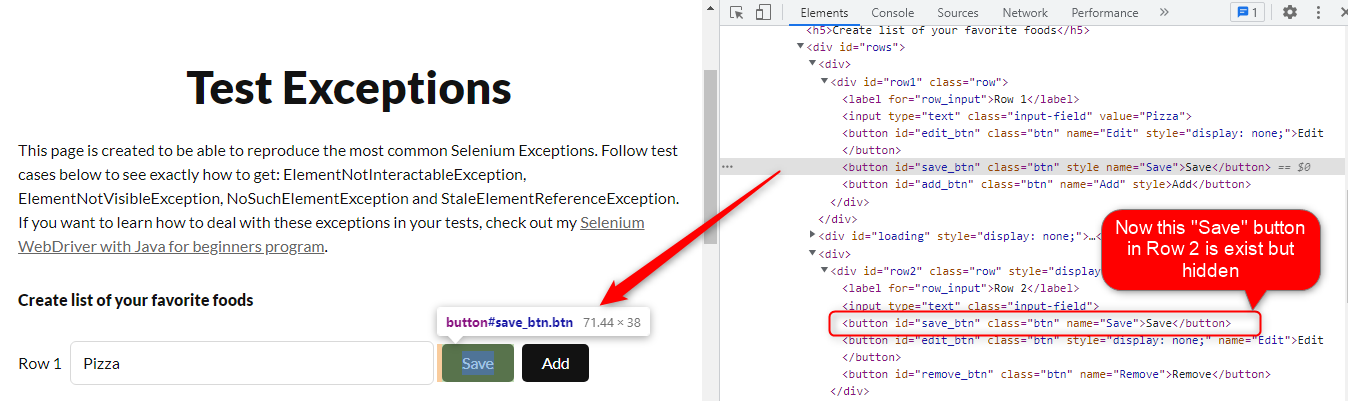

The solution for this issue is simply change the locator method using unique identifier

    Before

In [ ]:
"Push Save button using locator By.name('Save')"
save_btn_locator = driver.find_element(By.NAME, "Save")
save_btn_locator.click()


    After

In [ ]:
save_btn_locator = driver.find_element(By.XPATH, "//div[@id='row2']/button[@name='Save']")
save_btn_locator.click()

## Test Case 3: InvalidElementStateException

Testing Step
1. Open page
2. Clear input field
3. Type text into the input field
4. Verify text changed

This test case can be converted into these scripts:

In [ ]:
def test_invalid_state(self, driver):
    # 1 Open Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")
    wait = WebDriverWait(driver, 10)

    "2. Clear Input Field"
    # Locate the textbox
    row1_textbox = driver.find_element(By.CLASS_NAME, "input-field")

    # Clear the text
    row1_textbox.clear()

When we try to execute those scripts, we'll receive error syntax:
`selenium.common.exceptions.InvalidElementStateException: Message: invalid element state: Element is not currently interactable and may not be manipulated`
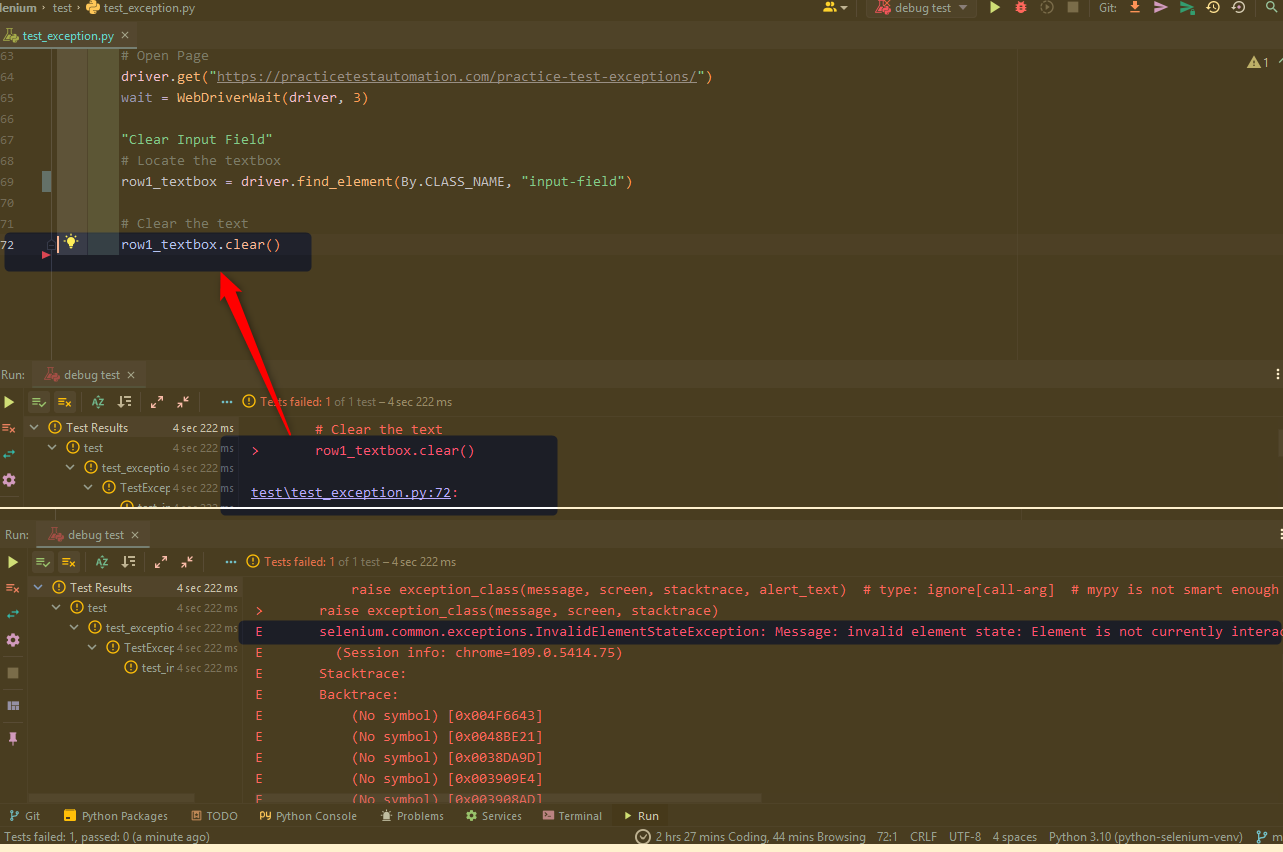


Possible causes for this error can include:
- Attempting to interact with an element that is not visible or enabled on the page
- Attempting to interact with an element that is not present in the DOM
- Attempting to interact with an element that has been previously interacted with and is no longer valid (e.g. a stale element reference)
- Attempting to interact with an element that is in a state where it cannot be interacted with (e.g. a disabled text field)

By those reason, we need to isolate the latest cause since we handling input field
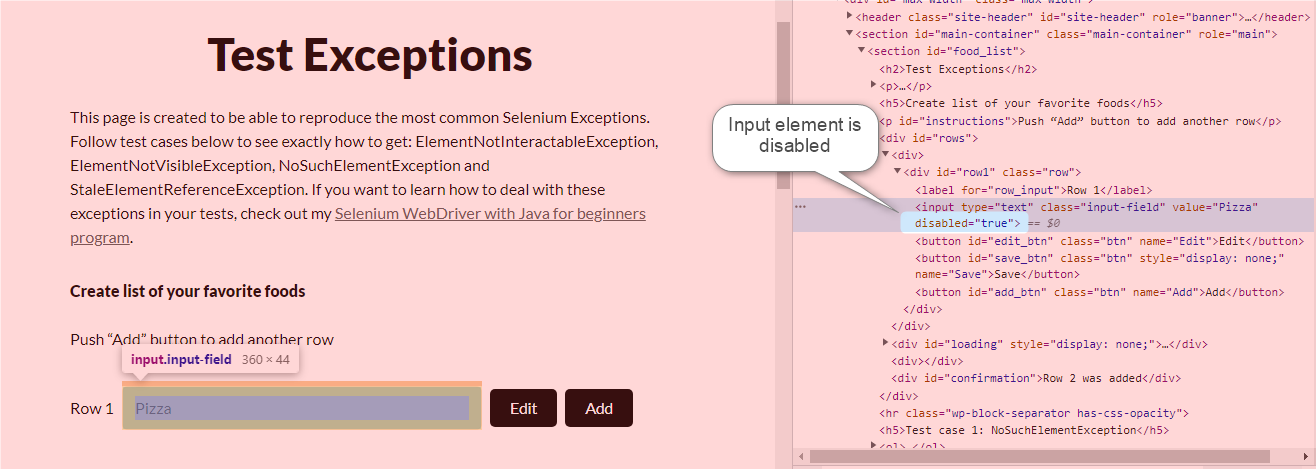

The solutions for that issue is adding extra step to enable the input element. In this case we will add edit button before the script for *clearing text* is executed <br>
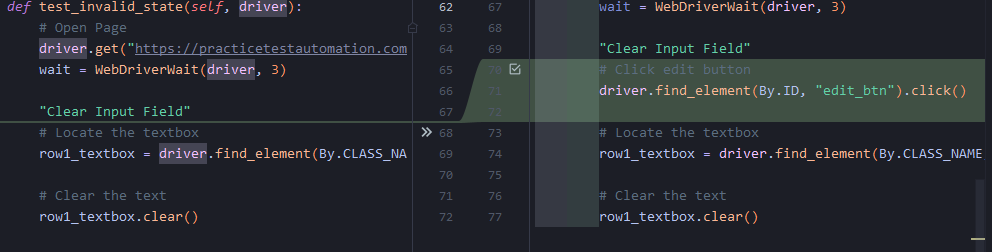

The next step is adjusting the textbox locator <br>
This is another extra modification to the test since the processes for running the clear step is too fast, in order to avoid the fail test due to the processes for enabling the input field is delayed, we need to adjust the `row1_textbox` locator into the proper method by adding these scripts. <br>
`wait.until(element_to_be_clickable(row1_textbox))`<br>
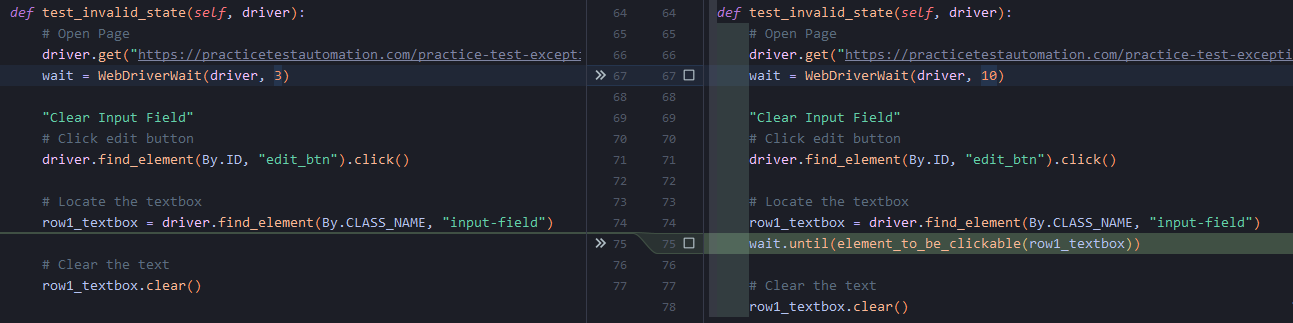

The function from that scripts is validating the input field, from disabled to be enabled (clickable) <br>
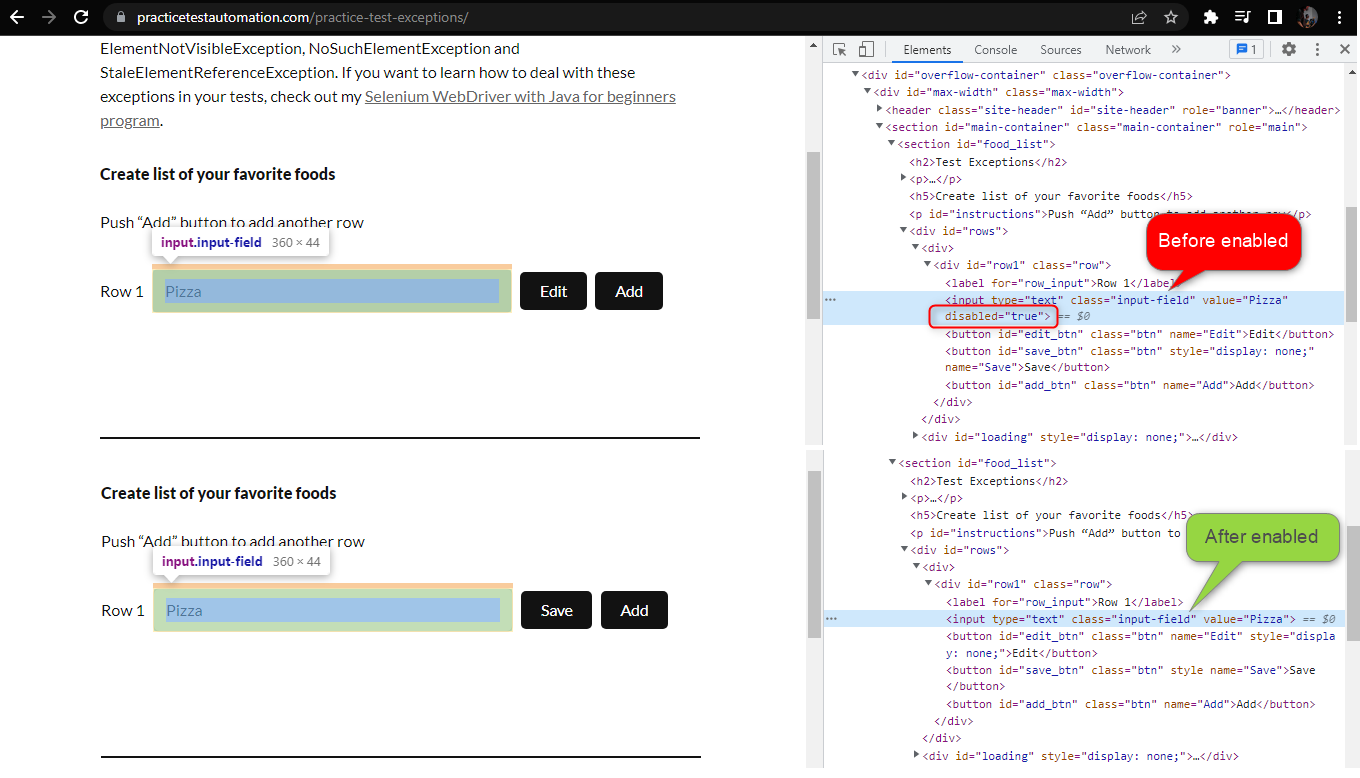


Then complete the rest of the script for the next steps.

In [ ]:
def test_invalid_state(self, driver):
    # Open Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")
    wait = WebDriverWait(driver, 10)

    "Clear Input Field"
    # Click edit button
    driver.find_element(By.ID, "edit_btn").click()

    # Locate the textbox
    row1_textbox = driver.find_element(By.CLASS_NAME, "input-field")
    wait.until(element_to_be_clickable(row1_textbox))

    # Clear the text
    row1_textbox.clear()

    "Type text into the field"
    row1_textbox.send_keys("Written using Python Selenium")

    "Verify The saved text"
    # Hit the save button
    wait.until(presence_of_element_located((By.ID, "save_btn"))).click()

    # Verify The success/saved toast-bar
    saved_toast = wait.until(visibility_of_element_located((By.ID, "confirmation")))
    assert saved_toast.text == "Row 1 was saved", "Unexpected toast bar message is found"

## Test Case 4: StaleElementReferenceException

1. Open page
2. Find the instructions text element
3. Push add button
4. Verify instruction text element is no longer displayed

Those steps can be converted into test script like this:

In [ ]:
def test_stale_element_reference(self, driver):
    # Open page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    # Find the instructions text element
    instruction_locator = driver.find_element(By.ID, "instructions")
    assert instruction_locator.is_displayed(), "Instructor text is missing"

    # Hit Add Button
    driver.find_element(By.ID, "add_btn").click()

    # Instruction text should be disappear
    assert not instruction_locator.is_displayed(), "Instruction text still exist"

After we run the test we will receive this error: <br>
`selenium.common.exceptions.StaleElementReferenceException: Message: stale element reference: element is not attached to the page document` <br>
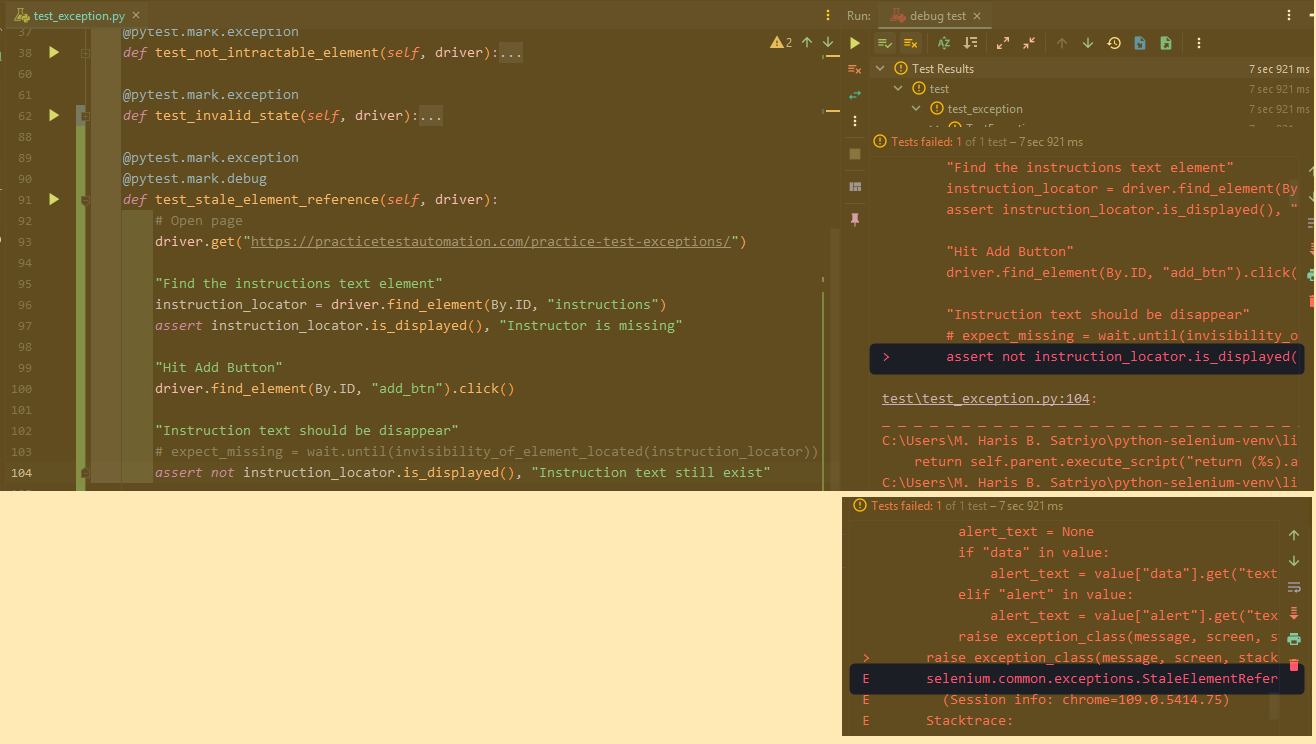

This can happen for a variety of reasons, such as: 
- element being dynamically removed from the page or the page being refreshed
- navigated to a different page.
- switched to another window or into or out of a frame or iframe

full docs: [selenium documentation](https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/#stale-element-reference-exception) <br>
But since we don't navigate to other page, or switch to other window, we can isolate the main cause for ***element is removed*** part.